<a href="https://colab.research.google.com/github/Noam-shahar/AI-course/blob/main/Mentor_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clean slate:

In [1]:
import os

directory = '/content/sample_data'

# Check if the directory exists
if os.path.exists(directory):
    # Remove all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path):
                os.remove(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
else:
    print(f"Directory '{directory}' does not exist.")

Organizing:

In [2]:
import shutil

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/sample_data'

source_path = '/content/drive/MyDrive/dataset_sized_5000'
destination_path = os.path.join(folder_path, os.path.basename(source_path))

# Perform the copy operation
shutil.copytree(source_path, destination_path)

Mounted at /content/drive


'/content/sample_data/dataset_sized_5000'

The model:



In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
data_dir = '/content/sample_data/dataset_sized_5000'
split_p = 0.2
batch_size = 32
image_size = (90, 90)
num_classes = 5

# Create ImageDataGenerator instance with rescaling only
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Flow images from the entire dataset directory with the validation split
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='sparse',
    subset='training'  # This retrieves the training data
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='sparse',
    subset='validation'  # This retrieves the validation data
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 90, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using augmented datasets
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy}")


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Epoch 1/10
125/125 [==============================] - 7s 38ms/step - loss: 0.3600 - accuracy: 0.8580 - val_loss: 0.0771 - val_accuracy: 0.9748
Epoch 2/10
125/125 [==============================] - 3s 24ms/step - loss: 0.0384 - accuracy: 0.9898 - val_loss: 0.0095 - val_accuracy: 0.9990
Epoch 3/10
125/125 [==============================] - 3s 25ms/step - loss: 0.0362 - accuracy: 0.9895 - val_loss: 0.0116 - val_accuracy: 0.9970
Epoch 4/10
125/125 [==============================] - 3s 24ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9980
Epoch 5/10
125/125 [==============================] - 5s 40ms/step - loss: 5.2963e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 6/10
125/125 [==============================] - 3s 26ms/step - loss: 2.8000e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9980
Epoch 7/10
125/125 [==============================

1/1 [==============================] - 0s 18ms/step
Predicted class: cube


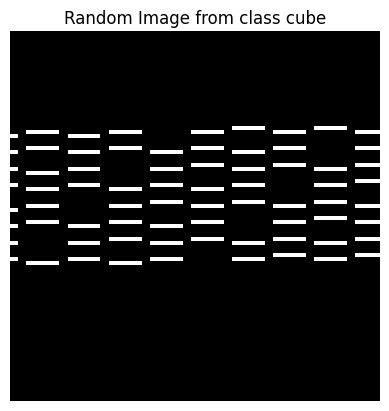

In [19]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image

# Get a list of all class names (assuming subfolders are named after classes)
class_names = sorted(os.listdir(data_dir))

# Select a random class
random_class = random.choice(class_names)

# Path to a random image within the selected class
random_image_path = os.path.join(data_dir, random_class)
random_image = random.choice(os.listdir(random_image_path))

# Load the random image and preprocess it
img_path = os.path.join(random_image_path, random_image)
img = image.load_img(img_path, target_size=(90, 90), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Display the image
plt.imshow(np.squeeze(img_array), cmap='gray')
plt.axis('off')
plt.title(f"Random Image from class {random_class}")

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print predicted class
print(f"Predicted class: {class_names[predicted_class]}")

plt.show()
